In [1]:
#!pip install lifelines

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import lifelines
data = pd.read_csv('lung.csv')
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
#transforming dependent variable
data.loc[data.status == 1, "status"] = 0
data.loc[data.status == 2, "status"] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


# Kaplan Meyer Estimator

In [4]:
# importing KaplanMeierFitter using the lifelines library
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = data.time, event_observed = data.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [5]:
model.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [6]:
# S05 Survival Curves

Text(0, 0.5, 'Survival')

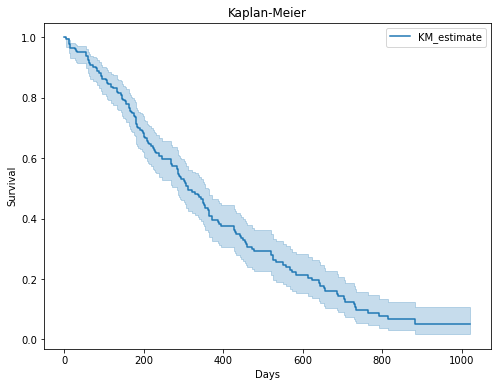

In [7]:
# survival curve
model.plot(figsize = (8,6))
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

 S07 Log Rank Test

In [8]:
# creating dataframe into male and female
male = data[data['sex']==1]
female = data[data['sex']==2]

In [9]:
male.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [10]:
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [11]:
# Kaplan meier estimator for male dataset
model_male = KaplanMeierFitter()
model_male.fit(durations = male.time, event_observed = male.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 138 total observations, 26 right-censored observations>

In [12]:
# Kaplan meier estimator for female dataset
model_female = KaplanMeierFitter()
model_female.fit(durations = female.time, event_observed = female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

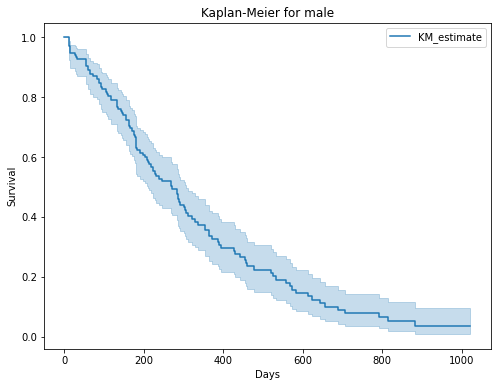

In [13]:
# survival curve for male
model_male.plot(figsize = (8,6))
plt.title("Kaplan-Meier for male")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

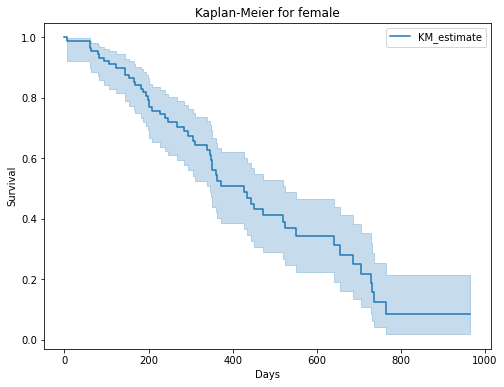

In [14]:
# survival curve for female
model_female.plot(figsize = (8,6))
plt.title("Kaplan-Meier for female")
plt.xlabel("Days")
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

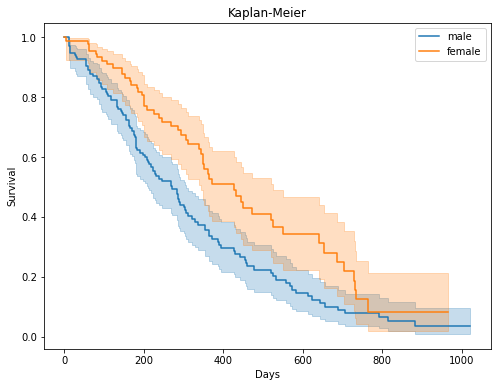

In [15]:
model_male.plot(figsize = (8,6),label = 'male')
model_female.plot(label = 'female')
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")


In [16]:
# log rank test
from lifelines.statistics import logrank_test
logrank_test(durations_A=male.time,
             durations_B=female.time,
             event_observed_A=male.status,
             event_observed_B=female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

## Cox Proportional Hazard

In [17]:
from lifelines import CoxPHFitter
model = CoxPHFitter()
model.fit(data, 'time', event_col = 'status')

TypeError: NaNs were detected in the dataset. Try using pd.isnull to find the problematic values.

In [ ]:
model.print_summary()

In [ ]:
# visualising the results
model.plot()